# Project : Car Price Predictor

# Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering:

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
name          892 non-null object
company       892 non-null object
year          892 non-null object
Price         892 non-null object
kms_driven    840 non-null object
fuel_type     837 non-null object
dtypes: object(6)
memory usage: 41.9+ KB


# Data Preparation(Data Cleaning):
    Due to presence of non-year values in year.

In [6]:
[car['year']]

[0      2007
 1      2006
 2      2018
 3      2014
 4      2014
        ... 
 887    zest
 888    2018
 889    2013
 890    2014
 891    2014
 Name: year, Length: 892, dtype: object]

In [7]:
car=car[car['year'].str.isnumeric()]

In [8]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [9]:
car['year']=car['year'].astype(int)          #car['year'] is an object data type, changing it into integer.

In [10]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [11]:
car['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [12]:
# Here price has "Ask For Price"

In [13]:
car=car[car['Price']!='Ask For Price']

In [14]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [15]:
car['Price']=car['Price'].str.replace(',','').astype(int)
car['Price']

C:\Users\KOUSTAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [16]:
car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [17]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')


C:\Users\KOUSTAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
car=car[car['kms_driven'].str.isnumeric()]

In [19]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [20]:
car['kms_driven']=car['kms_driven'].astype(int)
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: int32

In [21]:
car.shape

(817, 6)

In [22]:
car['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [23]:
car['fuel_type'].isnull().value_counts()

False    816
True       1
Name: fuel_type, dtype: int64

In [24]:
#fuel_type has one null value so we can delete that row
car=car[~car['fuel_type'].isnull()]
car.shape

(816, 6)

In [25]:
car['name'].value_counts()

Honda City                                 13
Honda Amaze                                11
Maruti Suzuki Dzire                        10
Mahindra Scorpio S10                        9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
                                           ..
Toyota Innova 2.5 V 7 STR                   1
Mahindra Quanto C4                          1
Tata Indica V2 eLS                          1
Mahindra Scorpio LX BS III                  1
Hyundai Verna 1.4 VTVT                      1
Name: name, Length: 463, dtype: int64

In [26]:
car=car.reset_index(drop=True)

In [27]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [28]:
car.to_csv('Prepared_Clean_data.csv')

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
name          816 non-null object
company       816 non-null object
year          816 non-null int32
Price         816 non-null int32
kms_driven    816 non-null int32
fuel_type     816 non-null object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [30]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,463,25,NaN,NaN,NaN,3
top,Honda City,Maruti,NaN,NaN,NaN,Petrol
freq,13,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [31]:
car=car[car['Price']<6500000]


In [32]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


# Relationship between Company & Price

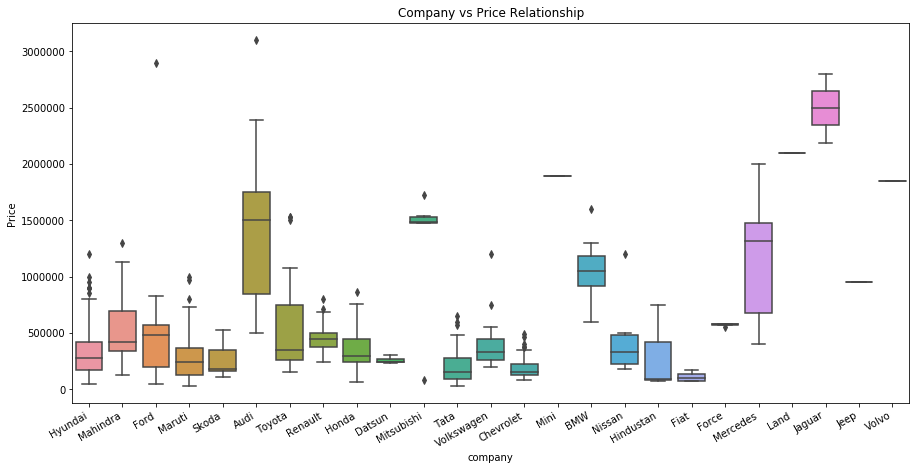

In [33]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x=car['company'],y=car['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.title('Company vs Price Relationship')
plt.show()

# Relationship between Year and Price

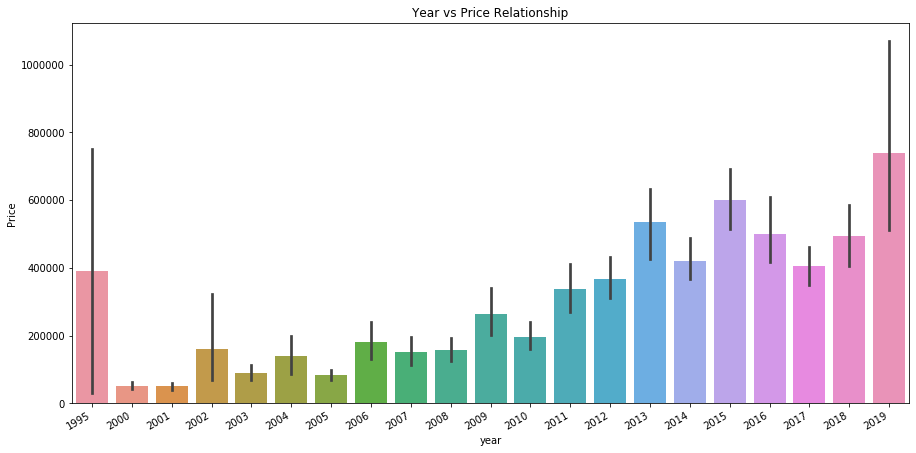

In [34]:
plt.subplots(figsize=(15,7))
ax=sns.barplot(x=car['year'],y=car['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.title('Year vs Price Relationship')
plt.show()

# Relationship between kms_driven and Price

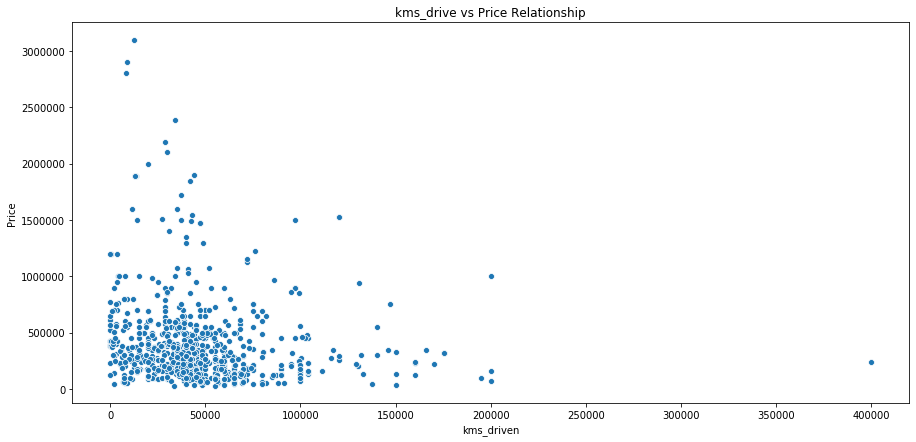

In [35]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x=car['kms_driven'],y=car['Price'])
plt.title('kms_drive vs Price Relationship')
plt.show()

# Relationship between fuel_type and Price

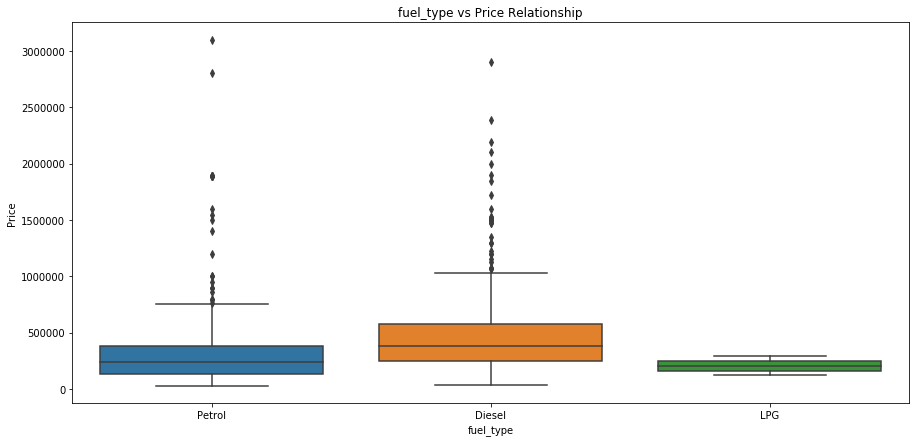

In [36]:
plt.subplots(figsize=(15,7))
sns.boxplot(x=car['fuel_type'],y=car['Price'])
plt.title('fuel_type vs Price Relationship')
plt.show()

# Relationship of Price with fuel_type,Year & Company in same plot

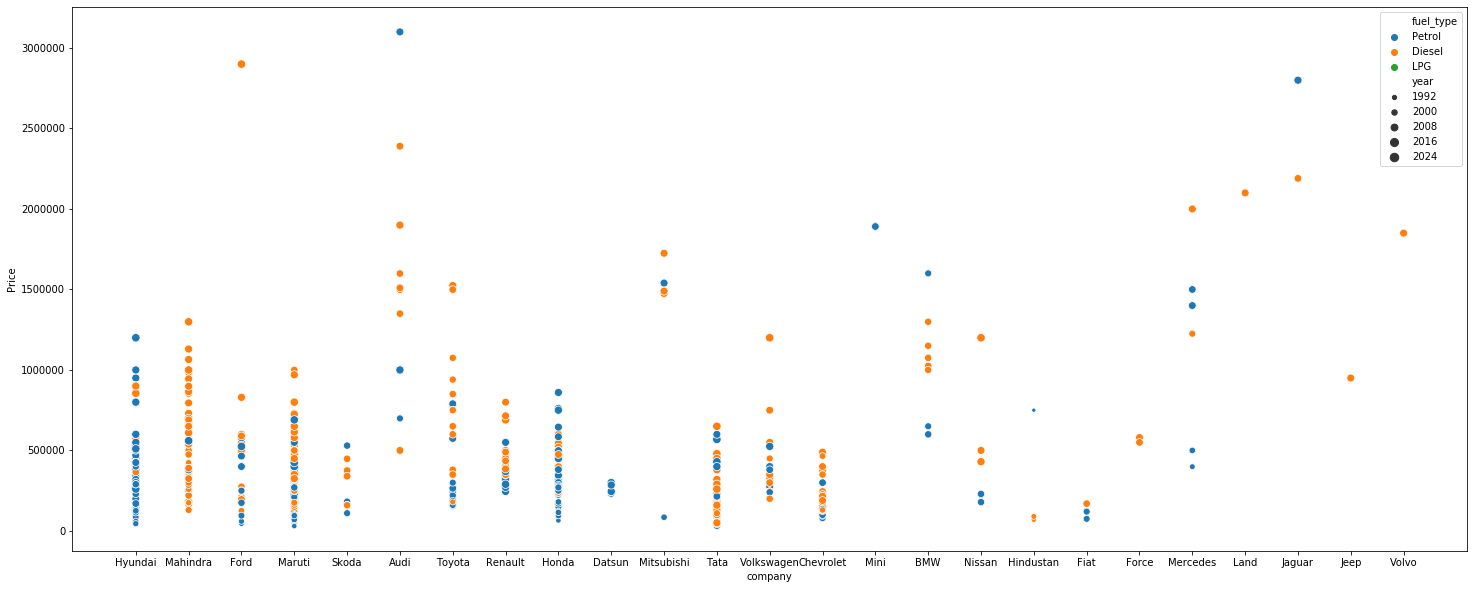

In [37]:
plt.subplots(figsize=(25,10))
sns.scatterplot(x=car['company'],y=car['Price'],hue=car['fuel_type'],size=car['year'])
plt.show()

# Extracting the Training Data

In [38]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,27000,Diesel


# Applying Train_Test_Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

In [42]:
OHE=OneHotEncoder()
OHE.fit(X[['name','company','fuel_type']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [43]:
column_trans=make_column_transformer((OneHotEncoder(categories=OHE.categories_),['name','company','fuel_type']),
                                    (PolynomialFeatures(degree=20),['kms_driven']),remainder='passthrough')

In [44]:
column_trans

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categorical_features=None,
                                               categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                               drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=

In [45]:
lr=LinearRegression()                 #Linear Regression Model

In [46]:
pipeline=make_pipeline(column_trans,lr)            #Making Pipeline

In [47]:
pipeline

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium'...
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                 

In [48]:
scoring_func=make_scorer(r2_score,greater_is_better=False)   #Making scoring function compatible with cross_val_score

In [49]:
-cross_val_score(pipeline,X,y,scoring=scoring_func,cv=10)        #Applying cross validation

array([-7.73425991e-03, -3.83441046e-02, -3.96343937e-02, -2.60850438e-02,
       -8.64946962e+08, -2.65242222e-02, -8.06878115e-02, -4.88389936e-02,
       -6.15425735e-03, -7.18093353e-02])

In [50]:
pipeline.fit(X_train,y_train)         #Fitting the model

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium'...
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                 

In [51]:
y_pred=pipeline.predict(X_test)

In [52]:
r2_score(y_test,y_pred)          #Checking R2 Score

-0.00015983759308491052

In [53]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [54]:
np.argmax(scores)

610

In [55]:
scores[np.argmax(scores)]

6.186395840046544e-11

In [56]:
pipeline.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Ford EcoSport Titanium 1.5L TDCi','Ford',2019,100,'Petrol']).reshape(1,5)))

array([402887.51891329])

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipeline=make_pipeline(column_trans,lr)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
r2_score(y_test,y_pred)

6.186395840046544e-11

In [58]:
import pickle

In [59]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [60]:
del pipeline

In [61]:
pipeline=pickle.load(open('LinearRegressionModel.pkl','rb'))

In [62]:
pipeline.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Ford EcoSport Titanium 1.5L TDCi','Ford',2019,100,'Petrol']).reshape(1,5)))

array([404519.08581131])

In [63]:
pipeline.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
       'BMW 5 Series 520d Sedan', 'BMW 5 Series 530i',
       'BMW 7 Series 740Li Sedan', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d xLine', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS Diesel',
       'Chevrolet Beat LS Petrol', 'Chevrolet Beat LT Diesel',
       'Chevrolet Beat LT Opt Diesel', 'Chevrolet Beat LT Petrol',
       'Chevrolet Beat PS Diesel', 'Chevrolet Cruze LTZ',
       'Chevrolet Cruze LTZ AT', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4 LS 8 STR', 'Chevrolet Sail 1.2 LS',
       'Chevrolet Sail UVA Petrol LT ABS', 'Chevrolet Spark',
       'Chevrolet Spark 1.0 LT', 'Chevrolet Spark LS 1.0',
       'Chevrolet Spar